<a href="https://colab.research.google.com/github/wonseoyul/basicstatistics-programming/blob/main/Final_Exam_2022_%EC%9B%90%EC%84%9C%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기초 데이터 기말 고사


#1. 주어진 데이터를 활용하여 고주파 노이즈를 제거하고 사용한 필터의 설계 이유의 근거를 제시하시요.

In [ ]:
# 코드
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


zip_path = tf.keras.utils.get_file(
  origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
  fname='jena_climate_2009_2016.csv.zip',
  extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)

uni_data = df['T (degC)']
uni_data.index = df['Date Time']
print(uni_data.head())

uni_data.plot(subplots=True)
plt.show()

In [ ]:
len(uni_data)
alpha = 0.7
n_samples =420551
time_end = 10

dt= time_end / n_samples
time=np.arange(0,time_end, dt)
x_meas_save=np.zeros(n_samples)
x_esti_save=np.zeros(n_samples)

def low_pass_filter(x_meas,x_esti,m_alpha):
    x_esti=alpha*x_esti+(1-m_alpha)*x_meas
    return x_esti

In [ ]:
x_esti=None
for i in range(n_samples):
    x_meas = uni_data[i]
    if i == 0:
        x_esti=x_meas
    else:
        x_esti=low_pass_filter(x_meas,x_esti,alpha)

    x_meas_save[i]=x_meas
    x_esti_save[i]=x_esti

In [ ]:
plt.plot(time, x_meas_save, 'g*', label='Measured')
plt.plot(time, x_esti_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('low_pass_filter.png')

사용근거 제출

1. 이유: 신호는 저주파 성분이고 노이즈는 고주파 성분으로 되어있기 때문에 저주파 필터를 사용을 했다.



2. 기타

#2. 위 데이터의 표준편차와 평균을 구하세요

In [ ]:
# mean . standard dev
print("표준편차:",  np.std(uni_data))
print("평균:", np.mean(uni_data))

#3.아래 조건부 확률을 파이썬을 사용하여 구하세요

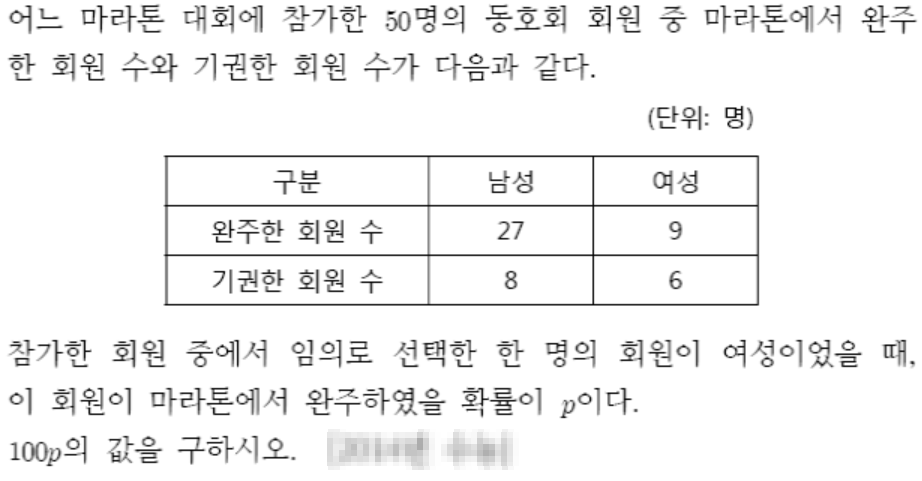

In [ ]:
import pandas as pd

marathon = {"finish":{"man":27,"woman":9},
            "withdraw":{"man":8,"woman":6}}

table = pd.DataFrame(marathon).transpose()
table

In [ ]:
# 사건 A <- 임의로 선택한 한 명의 회원이 여성일 사건 
# 사건 B <- 여자 회원 중 완주한 사건
# 시건 A와 B의 교집합  <- 임의로 선택한 한 명의 회원이 여성 중 완주했을 회원일 사건
P_woman = table.loc["finish"]["woman"].sum()/table.values.sum() + table.loc["withdraw"]["woman"].sum()/table.values.sum()
P_woman_finish = table.loc["finish"]["woman"]/table.values.sum()
print("임의로 선택한 한 명의 회원이 여성일 확률:",P_woman)
print("여자 회원 중 완주 했을 확률:",P_woman_finish)
A = P_woman
B = P_woman_finish
B / A * 100

#4. 확률밀도 함수

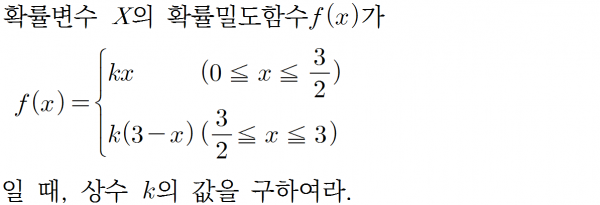

In [ ]:
#your code here
#확률 밀도 함수의 그래프와 y축 사이의 넓이가 1이어야 함
import sympy as sy
k = sy.Symbol('k') # k 미지수 설정
x=3/2
A=k*(3-3/2)
B=k*3/2
print("A:",A)
print("B:",B)
# x가 3/2일 때 y는 3/2*k이므로 x=3/2 기준 대칭, 3/2*3/2*k=1이다.
k=1*4/9
print("k=",k)

#5. Gaussian Elimination

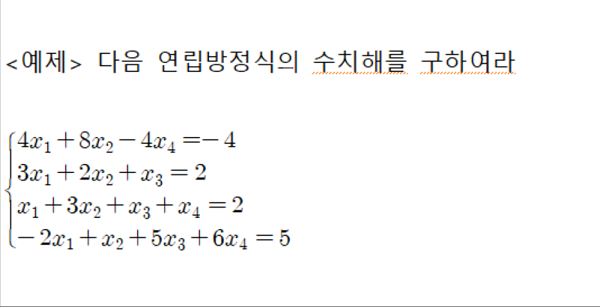

In [ ]:
# your code here
import numpy as np
a = np.array([[4.0,8.0, 0.0, -4.0],[3.0,2.0,1.0,0.0],[1.0,3.0,1.0,1.0],[-2.0,1.0,5.0,6.0]])
b = np.array([[-4.0],[2.0],[2.0],[5.0]])

In [ ]:
def check(a, b):
    print(a)
    print('=================')
    print(b)

In [ ]:
check(a,b)

In [ ]:
a[0] = a[0] / 4
b[0] = b[0] / 4
check(a,b)

In [ ]:
a[1] = a[1] - a[0] * 3
b[1] = b[1] - b[0] * 3
check(a,b)

In [ ]:
a[2] = a[2] - a[0] * 1
b[2] = b[2] - b[0] * 1
check(a,b)

In [ ]:
a[3] = a[3] + a[0] * 2
b[3] = b[3] + b[0] * 2
check(a,b)

In [ ]:
a[1] = a[1] / (4) 
b[1] = b[1] / (4)
check(a,b)

In [ ]:
a[0] = a[0] + a[1] * 2
b[0] = b[0] + b[1] * 2
check(a,b)

In [ ]:
a[2] = a[2] + a[1] * 1
b[2] = b[2] + b[1] * 1
check(a,b)

In [ ]:
a[3] = a[3] + a[1] * 5
b[3] = b[3] + b[1] * 5
check(a,b)

In [ ]:
a[1] = (-1) * a[1]
b[1] = (-1) * b[1]
check(a,b)

In [ ]:
a[0] = a[0] - a[2] * 2/5
b[0] = b[0] - b[2] * 2/5
check(a,b)

In [ ]:
a[1] = a[1] + a[2] * 1/5
b[1] = b[1] + b[2] * 1/5
check(a,b)

In [ ]:
a[3] = a[3] - a[2] * 5
b[3] = b[3] - b[2] * 5
check(a,b)

In [ ]:
a[2] = a[2]  * 0.8
b[2] = b[2]  * 0.8
check(a,b)

In [ ]:
a[3] = a[3]  * 1/6
b[3] = b[3]  * 1/6
check(a,b)

In [ ]:
a[2] = a[2] + (a[3] * 22/10)
b[2] = b[2] + (b[3] * 22/10)
check(a,b)

In [ ]:
a[1] = a[1] - (a[3] * 0.2) 
b[1] = b[1] - (b[3] * 0.2)
check(a,b)

In [ ]:
a[0][3] = a[0][3] - (a[3][3] * 0.6) 
b[0] = b[0] - (b[3] * 0.6)
check(a,b)

In [ ]:
int(5.55111512e-17)

In [ ]:
a[3] = a[3]  * (-1)
b[3] = b[3]  * (-1)
check(a,b)

In [ ]:
print("x1=",float(b[0]))
print("x2=",float(b[1]))
print("x3=",float(b[2]))
print("x4=",float(b[3]))

6. Pseudo Inverse matrix를 이용한 연립 방정식 해 구하기

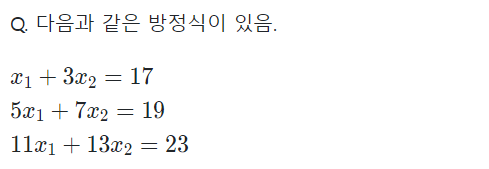

위 수식의 x1, x2를 pusedo inverse matrix를 사용하여 구하세요.

In [ ]:
import numpy as np
import numpy.linalg as lin

a = np.array([[1.0,3.0],[5.0,7.0],[11.0,13.0]])
print(a)
print(a.shape)

#정방행렬이 아니면 pinv, 정방행렬이라면 inv (역행렬)
inv_a = lin.pinv(a)
print(inv_a)

b = np.array([17.0,19.0,23.0]).reshape(3,1)
print(b)
print(b.shape)

c = np.matmul(inv_a, b)
print(c)  

prey = c[0,0] * 1 + c[1,0] * 3
print(prey)

prey = c[0,0] * 5 + c[1,0] * 7
print(prey)

prey = c[0,0] * 11 + c[1,0] * 13
print(prey)
#값이 각각 17,19,23과 비슷하게 나오는 것 확인

In [ ]:
print("x1:",float(c[0]))
print("x2:",float(c[1]))